DESCRIÇÃO DETALHADA DO ALGORITMO



In [4]:
# MAIN
# Dataset: série diária de medida de temperatura extraída do inmet

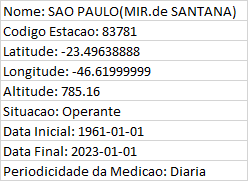

### IMPORTANDO DADOS

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


#conexão com drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# criando dataframe pandas a partir de dataset baixado
dados = pd.read_csv('/content/drive/MyDrive/Inteligência Artificial/dados_clima_sp/dados_83781_D_1961-01-01_2023-01-01.csv', sep=';')
dados.head()

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO(mm)","TEMPERATURA MAXIMA, DIARIA(°C)","TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)","TEMPERATURA MINIMA, DIARIA(°C)"
0,01/01/1961,0.1,24.9,21.22,18.5
1,02/01/1961,5.0,22.7,20.84,19.7
2,03/01/1961,44.9,28.5,21.70,17.8
3,04/01/1961,0.0,27.2,21.72,18.7
4,05/01/1961,7.5,25.8,21.30,18.0


### TRATANDO DADOS

In [8]:
# retirando nan's
columns = dados.columns
for column in columns:
    dados[column] = dados[column].replace(999.90, np.nan)

dados = dados.dropna()
dados.tail()

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO(mm)","TEMPERATURA MAXIMA, DIARIA(°C)","TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)","TEMPERATURA MINIMA, DIARIA(°C)"
22641,28/12/2022,30.1,27.1,21.90,19.4
22642,29/12/2022,2.2,27.1,22.06,19.2
22643,30/12/2022,11.7,26.7,21.94,19.2
22644,31/12/2022,0.0,27.1,21.78,18.4
22645,01/01/2023,9.1,27.9,22.66,18.0


In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21797 entries, 0 to 22645
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Data Medicao                              21797 non-null  object 
 1   PRECIPITACAO TOTAL, DIARIO(mm)            21797 non-null  float64
 2   TEMPERATURA MAXIMA, DIARIA(°C)            21797 non-null  float64
 3   TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)  21797 non-null  float64
 4   TEMPERATURA MINIMA, DIARIA(°C)            21797 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1021.7+ KB


In [10]:
# Corrigindo colunas alvo
dados['Data_Medicao'] = pd.to_datetime(dados['Data Medicao'],format='%d/%m/%Y')
dados['TEMP_MAX'] = dados['TEMPERATURA MAXIMA, DIARIA(°C)']
dados['TEMP_MIN'] = dados['TEMPERATURA MINIMA, DIARIA(°C)']
dados['TEMP_MED'] = dados['TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)']
dados.tail()

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO(mm)","TEMPERATURA MAXIMA, DIARIA(°C)","TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)","TEMPERATURA MINIMA, DIARIA(°C)",Data_Medicao,TEMP_MAX,TEMP_MIN,TEMP_MED
22641,28/12/2022,30.1,27.1,21.90,19.4,2022-12-28,27.1,19.4,21.90
22642,29/12/2022,2.2,27.1,22.06,19.2,2022-12-29,27.1,19.2,22.06
22643,30/12/2022,11.7,26.7,21.94,19.2,2022-12-30,26.7,19.2,21.94
22644,31/12/2022,0.0,27.1,21.78,18.4,2022-12-31,27.1,18.4,21.78
22645,01/01/2023,9.1,27.9,22.66,18.0,2023-01-01,27.9,18.0,22.66


In [11]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21797 entries, 0 to 22645
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Data Medicao                              21797 non-null  object        
 1   PRECIPITACAO TOTAL, DIARIO(mm)            21797 non-null  float64       
 2   TEMPERATURA MAXIMA, DIARIA(°C)            21797 non-null  float64       
 3   TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)  21797 non-null  float64       
 4   TEMPERATURA MINIMA, DIARIA(°C)            21797 non-null  float64       
 5   Data_Medicao                              21797 non-null  datetime64[ns]
 6   TEMP_MAX                                  21797 non-null  float64       
 7   TEMP_MIN                                  21797 non-null  float64       
 8   TEMP_MED                                  21797 non-null  float64       
dtypes: datetime64[ns](1), float64

In [12]:
# Filtrando as linhas correspondentes ao mês alvo
df = dados[(dados['Data_Medicao'].dt.month == 10) & (dados['Data_Medicao'].dt.year >= 2000 ) & (dados['Data_Medicao'].dt.year <= 2015)]
df.tail()

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO(mm)","TEMPERATURA MAXIMA, DIARIA(°C)","TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)","TEMPERATURA MINIMA, DIARIA(°C)",Data_Medicao,TEMP_MAX,TEMP_MIN,TEMP_MED
20022,27/10/2015,0.1,28.4,22.00,19.1,2015-10-27,28.4,19.1,22.00
20023,28/10/2015,0.0,23.9,20.42,18.6,2015-10-28,23.9,18.6,20.42
20024,29/10/2015,0.0,24.8,20.56,18.2,2015-10-29,24.8,18.2,20.56
20025,30/10/2015,0.0,31.2,23.86,19.1,2015-10-30,31.2,19.1,23.86
20026,31/10/2015,0.0,29.3,23.18,18.2,2015-10-31,29.3,18.2,23.18


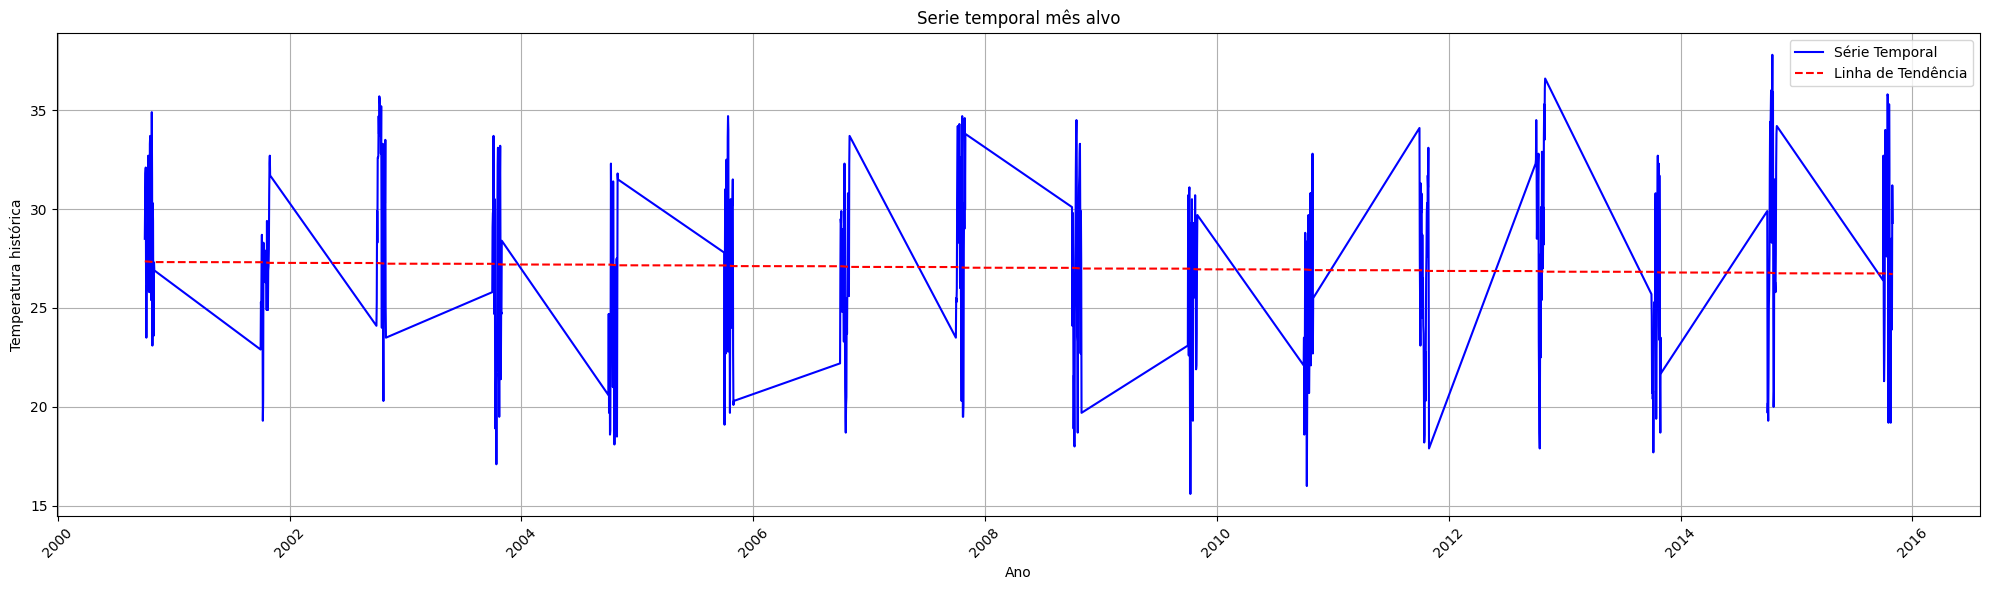

In [13]:
# CRIANDO GRÁFICO PARA MELHOR VISUALIZAÇÃO DA SERIE TEMPORAL

# Ajustando tamanho do gráfico
plt.figure(figsize=(20,6))

# Criando uma linha de tendência para os dados (com base em regressão linear)
x = np.arange(len(df))
y = df['TEMP_MAX']
coefficients = np.polyfit(x, y, 1)
trend_line = np.poly1d(coefficients)

# Plotando a série temporal
plt.plot(df['Data_Medicao'], df['TEMP_MAX'], label='Série Temporal', color='b')

# Plotando a linha de tendência
plt.plot(df['Data_Medicao'], trend_line(x), label='Linha de Tendência', color='r', linestyle='--')

# Configurando rótulos e título
plt.xlabel('Ano')
plt.ylabel('Temperatura histórica')
plt.title('Serie temporal mês alvo')



# Mostrar a legenda
plt.legend()

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Exibir o gráfico
plt.grid(True)
plt.tight_layout() # ajustar automaticamente a disposição dos elementos em um gráfico ou figura para evitar sobreposição
plt.show()

### ANALISANDO DADOS

https://biangomes.medium.com/s%C3%A9rie-estacion%C3%A1ria-com-dickley-fuller-85cb1d501631

In [14]:
# teste Dickey-Fuller para verificar a estacionariedade
# a decisão de aceitação da hipótese de estacionariedade se dá estabelecido se o valor (p-value) obtido for menor que 0.05.
#  o valor do teste tem que ser menor que o valor crítico para esse mesmo nível de significância
from statsmodels.tsa.stattools import adfuller

test_estacionariedade = adfuller(df['TEMP_MAX'])
output = pd.Series(test_estacionariedade[0:4], index = ['Teste', 'p-valor','Lags','Número de observações usadas'])

for key, value in test_estacionariedade[4].items():
  output['Valor crítico(%s)' %key] = value
print(output)

Teste                          -9.539706e+00
p-valor                         2.747597e-16
Lags                            2.000000e+00
Número de observações usadas    4.910000e+02
Valor crítico(1%)              -3.443739e+00
Valor crítico(5%)              -2.867444e+00
Valor crítico(10%)             -2.569915e+00
dtype: float64


In [15]:
print(test_estacionariedade)

(-9.539706042093535, 2.7475965576169857e-16, 2, 491, {'1%': -3.4437386290417082, '5%': -2.867444458865948, '10%': -2.5699148492415413}, 2644.6164782780056)


Diante dos valores do Teste e p-value, foi identificado que a série é estacionária. Modelo ideal nesse caso seria o ARMA

O modelo ARIMA é composto por três partes:

* Auto regressivo (AR): Yt é modelado por seus valores dos tempos anteriores.

* Integração (I): número de diferenciações para tornar a série estacionária.

* Média Móvel (MA): Yt é modelado com os valores do termo de erro dos tempos anteriores.


* P - Ordem da parte auto-regressiva: número de medições necessárias para se prever a próxima
* q - ordem da média móvel: valor do erro calculado para a medição anterior
* d - grau de diferenciação: número de vezes que ocorrem as transformações (uso de medições)

**Quantidade de termos em p**

Ambos os gráficos terão o primeiro pirulito com valor 1. Para saber o quanto de termos AR irá precisar, olhe para o gráfico de ACF e veja se o segundo lollipop caiu exponencialmente. Se caiu, olhe para o gŕafico de PACF e conte quantos pirulitos passam o valor crítico (faixa azulada horizontal) antes de retornarem para dentro da faixa.

**Quantidade de termos em q**

Um processo muito semelhante é feito para saber a quantidade de termos q. Olhe para o gráfico de PACF e veja se o segundo lollipop caiu exponencialmente. Se caiu, olhe para o gŕafico de ACF e conte quantos pirulitos passam o valor crítico (faixa azulada horizontal) antes de retornarem para dentro da faixa.


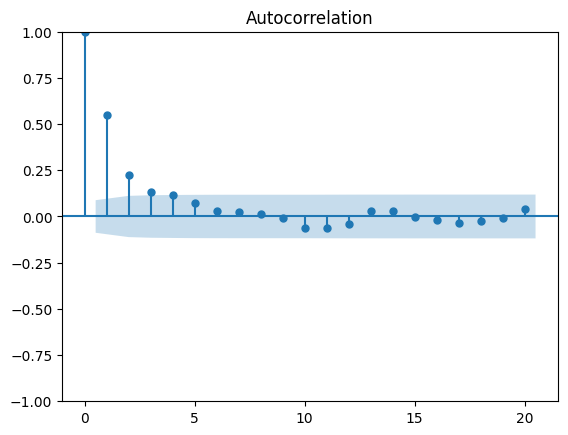

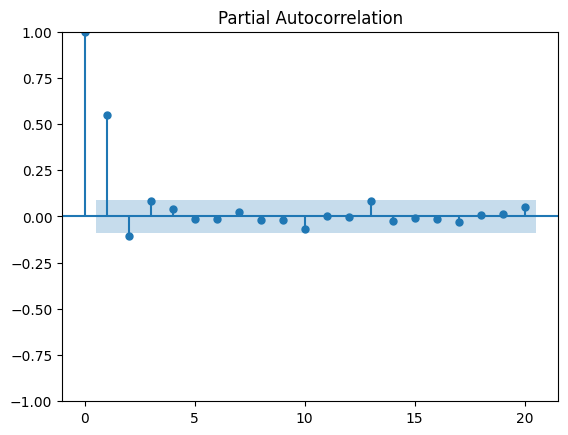

In [16]:
# INICIANDO CRIAÇÃO DO MODELO  DE AUTOREGRESSÃO ARIMA
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Verificando as funções ACF e PACF
#determinando q
acf = plot_acf(df['TEMP_MAX'], lags = 20)
# determinando p
pacf = plot_pacf(df['TEMP_MAX'], lags = 20)

In [17]:
# treinando modelo ARIMA
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
# Modelo Arima
model = sm.tsa.arima.ARIMA(df['TEMP_MAX'], order=(2,0,1))

results_AR = model.fit() #ajustando o modelo

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [18]:
print(results_AR.summary())

                               SARIMAX Results                                
Dep. Variable:               TEMP_MAX   No. Observations:                  494
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1366.369
Date:                Tue, 14 Nov 2023   AIC                           2742.739
Time:                        23:26:29   BIC                           2763.751
Sample:                             0   HQIC                          2750.988
                                - 494                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.0417      0.361     74.925      0.000      26.334      27.749
ar.L1          0.2573      0.330      0.779      0.436      -0.390       0.905
ar.L2          0.0794      0.196      0.405      0.6

### PREVENDO TEMPERATURA

In [20]:
# previsões para períodos futuros futuras
# entender melhor metodo forecast e predict
forecast = results_AR.predict()

# transformando previsão em dataset
df_max = forecast.to_frame()
df_max = df_max.reset_index()
df_max = df_max.drop('index', axis=1)
df_max

,predicted_mean
0,27.041709
1,27.839988
2,28.740305
3,29.600430
4,29.614287
...,...
489,28.707983
490,27.396933
491,25.091408
492,26.111238


In [21]:
forecast.head()

14518    27.041709
14519    27.839988
14520    28.740305
14521    29.600430
14522    29.614287
Name: predicted_mean, dtype: float64

In [22]:
# Criando a coluna "data" com valores a partir de "01/07/2016"
df_max = df_max.iloc[:31] # retornando os primeiros 31 resultados do predict()
df_max['data'] = pd.date_range(start='2016-10-01', periods=31, freq='D')
df_max.head()

<ipython-input-22-f0c39c406ae3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_max['data'] = pd.date_range(start='2016-10-01', periods=31, freq='D')


,predicted_mean,data
0,27.041709,2016-10-01
1,27.839988,2016-10-02
2,28.740305,2016-10-03
3,29.600430,2016-10-04
4,29.614287,2016-10-05


In [23]:
# Filtrando as linhas correspondentes ao mês de julho e ano de 2016 do dataset original
df_max_2 = dados.loc[(dados['Data_Medicao'].dt.month == 10) & (dados['Data_Medicao'].dt.year == 2016), ['Data_Medicao', 'TEMP_MAX']]
df_max_2.head()

,Data_Medicao,TEMP_MAX
20362,2016-10-01,20.2
20363,2016-10-02,23.8
20364,2016-10-03,17.2
20365,2016-10-04,22.9
20366,2016-10-05,21.4


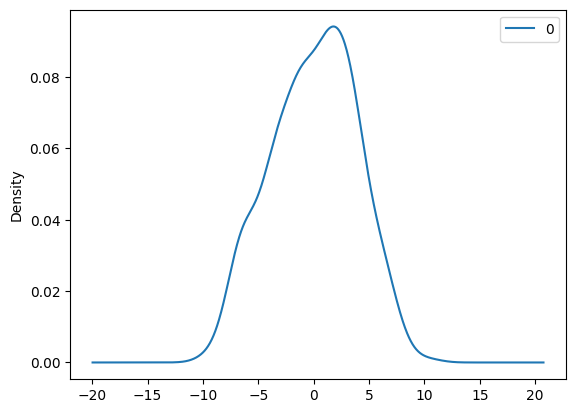

In [24]:
# trazendo os redisuos(erros ao longo do tempo)
from pandas import DataFrame

residuals = DataFrame(results_AR.resid)

residuals.plot(kind='kde') # grafico de densidade: reflete a normalidade dos dados
plt.show()

In [25]:
residuals.describe()

,0
count,494.000000
mean,-0.000924
std,3.848423
min,-9.783450
25%,-2.817591
50%,0.216813
75%,2.884340
max,10.568319


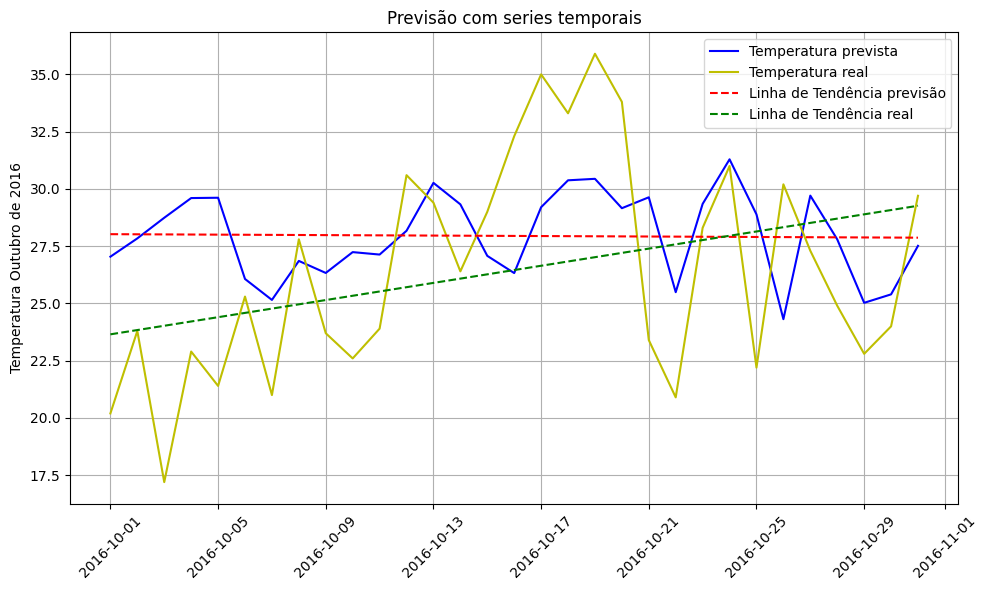

In [26]:
# Configurar o tamanho da figura
plt.figure(figsize=(10, 6))

# Converter a coluna de números inteiros em formato de data
# sp['YEAR'] = pd.to_datetime(sp['YEAR'], format='%Y')

# Ajustar uma linha de tendência (regressão linear) aos dados
x = np.arange(len(df_max))
y = df_max['predicted_mean']
coefficients = np.polyfit(x, y, 1)
trend_line = np.poly1d(coefficients)

# Ajustar uma linha de tendência (regressão linear) aos dados
a = np.arange(len(df_max_2))
b = df_max_2['TEMP_MAX']
coefficientes = np.polyfit(a, b, 1)
trend_line_02 = np.poly1d(coefficientes)

# Plotar a série temporal previsão
plt.plot(df_max['data'], df_max['predicted_mean'], label='Temperatura prevista', color='b')

# Plotar a série temporal real
plt.plot(df_max_2['Data_Medicao'], df_max_2['TEMP_MAX'], label='Temperatura real', color='y')

# Plotar a linha de tendência previsão
plt.plot(df_max['data'], trend_line(x), label='Linha de Tendência previsão', color='r', linestyle='--')

# Plotar a linha de tendência real
plt.plot(df_max_2['Data_Medicao'], trend_line_02(a), label='Linha de Tendência real', color='g', linestyle='--')


# Configurar rótulos e título
plt.ylabel('Temperatura Outubro de 2016')
plt.title('Previsão com series temporais')



# Mostrar a legenda
plt.legend()

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Exibir o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

Aplicar R² entre dados previstos e dados reais


In [27]:
# analisando os dados reais e previsão com o r-quadrado
from sklearn.metrics import r2_score

temp_prev = results_AR.predict()
temp_real = dados.TEMP_MAX[(dados['Data_Medicao'].dt.month == 10) & (dados['Data_Medicao'].dt.year == 2016)]
temp_prev = temp_prev[:len(temp_real)]
r_2 = r2_score(temp_real, temp_prev)

print(r_2)


0.014514964691341947
